 Articles and papers to look at:

https://aclanthology.org/W17-3502/  
https://aclanthology.org/D14-1074.pdf  
https://aclanthology.org/P17-4008.pdf  
http://computationalcreativity.net/iccc2012/wp-content/uploads/2012/05095-Colton.pdf  
https://era.ed.ac.uk/bitstream/handle/1842/314/IP040022.pdf?sequence=1  
https://aclanthology.org/2020.acl-main.223/  
https://arxiv.org/pdf/1610.09889.pdf  
https://www.researchgate.net/profile/Pablo-Gervas/publication/220831684_Poetry_generation_in_COLIBRI/links/61add74350e22929cd4e9ab6/Poetry-generation-in-COLIBRI.pdf 
http://nil.fdi.ucm.es/sites/default/files/GervasAISB2013CRC.pdf  

Here is an example of an RNN using Keras, only training on one document.

In [1]:
import pronouncing
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, LSTM, Embedding, Dropout
import matplotlib.pyplot as plt 
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import re

In [15]:
f = pd.read_csv("../input/poetry-foundation-poems/PoetryFoundationData.csv")
#f2 = pd.read_csv("StylusPoems2017-2022.csv")
print(len(f))

13854


In [53]:
s = "1234 abcd \n — \n— ź"
s = re.sub('—', '-', s)
s = re.sub('[^A-Za-z0-9\n,. !?-]+', '', s)

print(s)

1234 abcd 
 - 
- 


In [35]:
print(f['Poem'].values[1])


The old cupola glinted above the clouds, shone
among fir trees, but it took him an hour
for the half mile all the way up the hill. As he trailed,
the village passed him by, greeted him,
asked about his health, but everybody hurried
to catch the mass, left him leaning against fences,
measuring the road with the walking stick he sculpted.
He yearned for the day when the new church
would be built—right across the road. Now
it rises above the moon: saints in frescoes
meet the eye, and only the rain has started to cut
through the shingles on the roof of his empty
house. The apple trees have taken over the sky,
sequestered the gate, sidled over the porch.



In [44]:
print(f['Poem'].values[1][415] == '—')

True


In [54]:
nltk.download('punkt')
txt_batches = f['Poem'].values

for i,p in enumerate(txt_batches):
  s = txt_batches[i]
  s = s.replace("\n", " \n ")
  s = re.sub('—', '-', s)
  s = re.sub('[^A-Za-z0-9\n,. !?-]+', '', s)
  s = re.sub('\b\b+', ' ', s)
  s = s.lower()
  s = s.split("\n")
  temp = [""]
  temp = np.array(temp)
  for sent in s:
    temp = np.append(temp, np.array(word_tokenize(sent)))
    temp = np.append(temp, "\n")
  s = temp
  txt_batches[i] = s[1:]

print(txt_batches[1])
  

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['\n' 'the' 'old' 'cupola' 'glinted' 'above' 'the' 'clouds' ',' 'shone'
 '\n' 'among' 'fir' 'trees' ',' 'but' 'it' 'took' 'him' 'an' 'hour' '\n'
 'for' 'the' 'half' 'mile' 'all' 'the' 'way' 'up' 'the' 'hill' '.' 'as'
 'he' 'trailed' ',' '\n' 'the' 'village' 'passed' 'him' 'by' ',' 'greeted'
 'him' ',' '\n' 'asked' 'about' 'his' 'health' ',' 'but' 'everybody'
 'hurried' '\n' 'to' 'catch' 'the' 'mass' ',' 'left' 'him' 'leaning'
 'against' 'fences' ',' '\n' 'measuring' 'the' 'road' 'with' 'the'
 'walking' 'stick' 'he' 'sculpted' '.' '\n' 'he' 'yearned' 'for' 'the'
 'day' 'when' 'the' 'new' 'church' '\n' 'would' 'be' 'built-right'
 'across' 'the' 'road' '.' 'now' '\n' 'it' 'rises' 'above' 'the' 'moon'
 'saints' 'in' 'frescoes' '\n' 'meet' 'the' 'eye' ',' 'and' 'only' 'the'
 'rain' 'has' 'started' 'to' 'cut' '\n' 'through' 'the' 'shingles' 'on'
 'the' 'roof' 'of' 'his' 'empty' '\n' 'house' '.' 'the' 'apple' 'trees'
 'have' 'taken' 'over' 'the' 'sky' ',' '\n' 'sequestered' 'the' 'gate' ','
 

In [55]:
print(txt_batches[1])

['\n' 'the' 'old' 'cupola' 'glinted' 'above' 'the' 'clouds' ',' 'shone'
 '\n' 'among' 'fir' 'trees' ',' 'but' 'it' 'took' 'him' 'an' 'hour' '\n'
 'for' 'the' 'half' 'mile' 'all' 'the' 'way' 'up' 'the' 'hill' '.' 'as'
 'he' 'trailed' ',' '\n' 'the' 'village' 'passed' 'him' 'by' ',' 'greeted'
 'him' ',' '\n' 'asked' 'about' 'his' 'health' ',' 'but' 'everybody'
 'hurried' '\n' 'to' 'catch' 'the' 'mass' ',' 'left' 'him' 'leaning'
 'against' 'fences' ',' '\n' 'measuring' 'the' 'road' 'with' 'the'
 'walking' 'stick' 'he' 'sculpted' '.' '\n' 'he' 'yearned' 'for' 'the'
 'day' 'when' 'the' 'new' 'church' '\n' 'would' 'be' 'built-right'
 'across' 'the' 'road' '.' 'now' '\n' 'it' 'rises' 'above' 'the' 'moon'
 'saints' 'in' 'frescoes' '\n' 'meet' 'the' 'eye' ',' 'and' 'only' 'the'
 'rain' 'has' 'started' 'to' 'cut' '\n' 'through' 'the' 'shingles' 'on'
 'the' 'roof' 'of' 'his' 'empty' '\n' 'house' '.' 'the' 'apple' 'trees'
 'have' 'taken' 'over' 'the' 'sky' ',' '\n' 'sequestered' 'the' 'gate' ','
 

In [56]:
text = []
print(len(txt_batches))


for b in txt_batches:
    text.append(" ".join(b))
    
print(text[1])
    

13854

 the old cupola glinted above the clouds , shone 
 among fir trees , but it took him an hour 
 for the half mile all the way up the hill . as he trailed , 
 the village passed him by , greeted him , 
 asked about his health , but everybody hurried 
 to catch the mass , left him leaning against fences , 
 measuring the road with the walking stick he sculpted . 
 he yearned for the day when the new church 
 would be built-right across the road . now 
 it rises above the moon saints in frescoes 
 meet the eye , and only the rain has started to cut 
 through the shingles on the roof of his empty 
 house . the apple trees have taken over the sky , 
 sequestered the gate , sidled over the porch . 
 



In [57]:
text_chars = ""
for t in text:
    for c in t:
        text_chars += c
vocabulary = np.array(sorted(set(text_chars)))
tokenizer = {word:i for i,word in enumerate(vocabulary)}
print(vocabulary)


['\n' ' ' '!' ',' '-' '.' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '?' 'a'
 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's'
 't' 'u' 'v' 'w' 'x' 'y' 'z']


In [58]:
print(tokenizer)

{'\n': 0, ' ': 1, '!': 2, ',': 3, '-': 4, '.': 5, '0': 6, '1': 7, '2': 8, '3': 9, '4': 10, '5': 11, '6': 12, '7': 13, '8': 14, '9': 15, '?': 16, 'a': 17, 'b': 18, 'c': 19, 'd': 20, 'e': 21, 'f': 22, 'g': 23, 'h': 24, 'i': 25, 'j': 26, 'k': 27, 'l': 28, 'm': 29, 'n': 30, 'o': 31, 'p': 32, 'q': 33, 'r': 34, 's': 35, 't': 36, 'u': 37, 'v': 38, 'w': 39, 'x': 40, 'y': 41, 'z': 42}


In [59]:
vector = np.array([tokenizer[char] for char in text_chars])
print('\nSample Text \n')
print('-'*70)
print(text_chars[0:100])
print('-'*70)
print('\n\nCorresponding Integer Vector \n')
print('-'*70)
print(vector[0:100])
print('-'*70)

print(len(vector))




Sample Text 

----------------------------------------------------------------------

 dog bone , stapler , 
 cribbage board , garlic press 
 because this window is loose-lacks 
 suctio
----------------------------------------------------------------------


Corresponding Integer Vector 

----------------------------------------------------------------------
[ 0  1 20 31 23  1 18 31 30 21  1  3  1 35 36 17 32 28 21 34  1  3  1  0
  1 19 34 25 18 18 17 23 21  1 18 31 17 34 20  1  3  1 23 17 34 28 25 19
  1 32 34 21 35 35  1  0  1 18 21 19 17 37 35 21  1 36 24 25 35  1 39 25
 30 20 31 39  1 25 35  1 28 31 31 35 21  4 28 17 19 27 35  1  0  1 35 37
 19 36 25 31]
----------------------------------------------------------------------
20198243


In [60]:
count = 0

for v in vector:
    if v == 0: count += 1

print(count)

393000


In [61]:
print(text[0])


 dog bone , stapler , 
 cribbage board , garlic press 
 because this window is loose-lacks 
 suction , lacks grip . 
 bungee cord , bootstrap , 
 dog leash , leather belt 
 because this window had sash cords . 
 they frayed . they broke . 
 feather duster , thatch of straw , empty 
 bottle of elmers glue 
 because this window is loud-its hinges clack 
 open , clack shut . 
 stuffed bear , baby blanket , 
 single crib newel 
 because this window is split . its dividing 
 in two . 
 velvet moss , sagebrush , 
 willow branch , robins wing 
 because this window , its pane-less . its only 
 a frame of air . 
 



In [62]:
vector = tf.data.Dataset.from_tensor_slices(vector)
sequences = vector.batch(200, drop_remainder=True)

def prepare_dataset(seq):
     input_vector = seq[:-1]
     target_vector = seq[1:]
     return input_vector, target_vector
dataset = sequences.map(prepare_dataset)

2022-12-03 06:15:59.189243: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 06:15:59.288110: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 06:15:59.288970: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 06:15:59.292192: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [63]:
print(len(vector))
print(len(sequences))
AUTOTUNE = tf.data.AUTOTUNE
 # buffer size 10000
 # batch size 200
data = dataset.batch(64, drop_remainder=True).repeat()
data = data.prefetch(AUTOTUNE)
 # steps per epoch is number of batches available
STEPS_PER_EPOCH = len(sequences)
for inp, tar in data.take(1):
    print(inp.numpy().shape)
    print(tar.numpy().shape)

20198243
100991
(64, 199)
(64, 199)


2022-12-03 06:16:26.025296: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [64]:
model = keras.Sequential([
     # Embed len(vocabulary) into 64 dimensions
     Embedding(len(vocabulary), 64, batch_input_shape=[64,None]),
     # LSTM RNN layers
     LSTM(512, return_sequences=True, stateful=True),
     LSTM(512, return_sequences=True, stateful=True),
     Dropout(.05),
     # Classification head
     Dense(len(vocabulary))
 ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (64, None, 64)            2752      
_________________________________________________________________
lstm (LSTM)                  (64, None, 512)           1181696   
_________________________________________________________________
lstm_1 (LSTM)                (64, None, 512)           2099200   
_________________________________________________________________
dropout (Dropout)            (64, None, 512)           0         
_________________________________________________________________
dense (Dense)                (64, None, 43)            22059     
Total params: 3,305,707
Trainable params: 3,305,707
Non-trainable params: 0
_________________________________________________________________


In [65]:
for example_inp, example_tar in data.take(1):
     example_pred = model(example_inp)
     print(example_tar.numpy().shape)
     print(example_pred.shape)

2022-12-03 06:16:59.441686: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


(64, 199)
(64, 199, 43)


In [66]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:

from keras.utils.vis_utils import plot_model

plot_model(model, 
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir="LR",
    expand_nested=True,
    dpi=120,
    layer_range=None)

In [67]:
#gpu necessary for this many epochs
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True))

history = model.fit(data, 
                     epochs= 4, 
                     steps_per_epoch=STEPS_PER_EPOCH)  

Epoch 1/4
100991/100991 [==============================] - 8581s 85ms/step - loss: 1.2675
Epoch 2/4
100991/100991 [==============================] - 8564s 85ms/step - loss: 1.2308
Epoch 3/4
100991/100991 [==============================] - 8588s 85ms/step - loss: 1.2399
Epoch 4/4
100991/100991 [==============================] - 8645s 86ms/step - loss: 1.2485


dict_keys(['loss'])


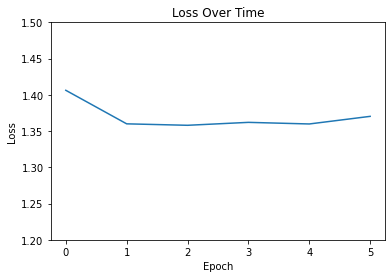

In [29]:

print(history.history.keys())

plt.plot(history.history['loss'])
plt.title('Loss Over Time')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(1.2,1.5)
plt.show()


In [68]:
print("start")
model.save('/kaggle/working/my_model.h5')
print("stop")

start
stop


In [ ]:
model = keras.models.load_model('/content/gdrive/My Drive/Stats/Stylus/')

In [ ]:
!pip install english-words
from english_words import english_words_lower_set

In [1]:
sample = 'he always loved '
lines = 5
 # vectorize the string
sample = sample.lower()
#count existing syllables
sample_vector = [tokenizer[char] for char in sample]
predicted = sample_vector
 # convert into tensor of required dimensions
sample_tensor = tf.expand_dims(sample_vector, 0) 
 # broadcast to first dimension to 64 
sample_tensor = tf.repeat(sample_tensor, 64, axis=0)

 # predict next 1000 characters
 # temperature is a sensitive variable to adjust prediction
temperature = .7
line_counter = 1
current_line = sample
line_check = True
num_tries = 0

while line_counter <= lines:
     pred = model(sample_tensor)
     pred = pred[0].numpy()/temperature
     pred = tf.random.categorical(pred, num_samples=1)[-1,0].numpy()
     if pred == 0:
       line_counter += 1
       if line_check:
           print(current_line)
           current_line = ""
           predicted.append(pred)
           sample_tensor = predicted[-499:]
           sample_tensor = tf.expand_dims([pred],0) 
           sample_tensor = tf.repeat(sample_tensor, 64, axis=0)
     else:
       guess = vocabulary[pred]
       current_line += guess
       predicted.append(pred)
       sample_tensor = predicted[-499:]
       sample_tensor = tf.expand_dims([pred],0) 
       sample_tensor = tf.repeat(sample_tensor, 64, axis=0)

NameError: name 'tokenizer' is not defined